In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif, mutual_info_classif

import warnings
warnings.filterwarnings("ignore")

# 1. Data cleaning

In [3]:
df = pd.read_csv('/Users/kathywu/Desktop/DATA1030/ML_project/Mushroom_Edibility_Classification_ML_Project/data/mushroom/secondary_data.csv', sep=';')
print(df.shape)
df.head()

(61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# check if the target variable is balanced
df.groupby(['class'])['class'].count() / df.shape[0]

class
e    0.445087
p    0.554913
Name: class, dtype: float64

In [5]:
print("The data types of the columns are:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

The data types of the columns are:
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


The features are:\
n: nominal, m: metrical
- **cap-diameter (m)**: float number in cm
- **cap-shape (n)**: bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
- **cap-surface (n)**: fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
- **cap-color (n)**: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
- **does-bruise-bleed (n)**: bruises-or-bleeding=t,no=f
- **gill-attachment (n)**: adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
- **gill-spacing (n)**: close=c, distant=d, none=f
- **gill-color (n)**: see cap-color + none=f
- **stem-height (m)**: float number in cm
- **stem-root (n)**: bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
- **stem-surface (n)**: see cap-surface + none=f
- **stem-color (n)**: see cap-color + none=f
- **veil-type (n)**: partial=p, universal=u
- **veil-color (n)**: see cap-color + none=f
- **has-ring (n)**: ring=t, none=f
- **ring-type (n)**: cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
- **spore-print-color (n)**:   see cap color
- **habitat (n)**: grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
- **season (n)**: spring=s, summer=u, autumn=a, winter=w


In [13]:
# change column type from object to category
for col in ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color','habitat', 'season']:
       df[col] = df[col].astype('category')

1.1 Check the missing values\
Among 20 features, there are 9 features that comtains missing value. 

In [225]:
# Check the missing values of data
# columns that have missing value
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
cap-surface          0.231214
gill-attachment      0.161850
gill-spacing         0.410405
stem-root            0.843931
stem-surface         0.624277
veil-type            0.947977
veil-color           0.878613
ring-type            0.040462
spore-print-color    0.895954
dtype: float64


1.2 Convert the Binary features

In [ ]:
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace('t', 1)
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace('f', 0)
df['has-ring'] = df['has-ring'].replace('t', 1)
df['has-ring'] = df['has-ring'].replace('f', 0)

1.3 Split the target variable and the predictors

In [15]:
# split the features and target variable
y = df['class']
X = df.drop(columns='class')
print(X.shape, y.shape)

(61069, 20) (61069,)


# 2. EDA

2.1 histogram of continous variables

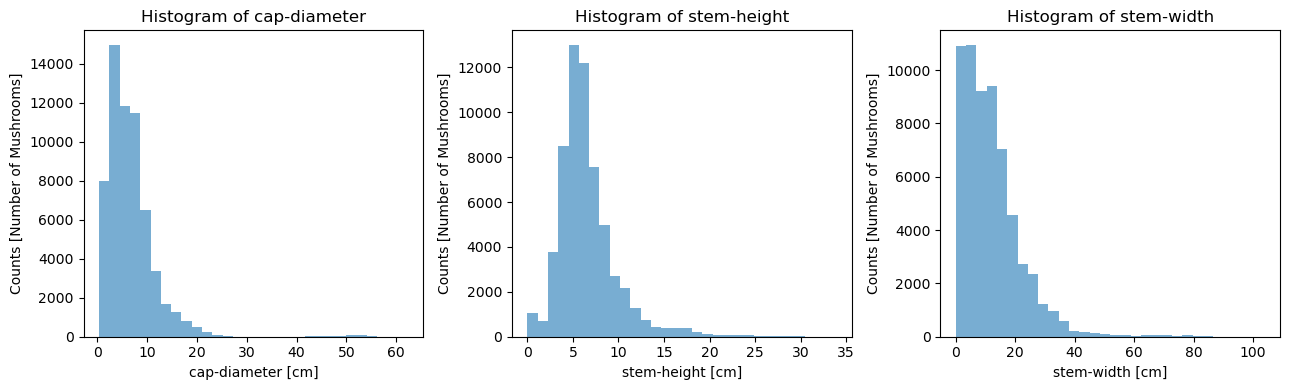

In [196]:
# The histogram of all the features
plt.figure(figsize=(13,4))
i=0
for col in ['cap-diameter', 'stem-height', 'stem-width']:
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, alpha=0.6)
    plt.xlabel("{} [cm]".format(col), fontsize=10)
    plt.ylabel('Counts [Number of Mushrooms]')
    plt.title('Histogram of {}'.format(col))
    i += 1
plt.tight_layout()
plt.show()

2.2 stacked bar plot of cap-color vs. edibility

In [115]:
count_matrix = df.groupby(['cap-color', 'class']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0).sort_values(['e'], ascending=False)
print(count_matrix_norm)

class          e      p
cap-color              
b            974    256
e            880   3155
g           2297   2123
k            501    778
l            452    376
n          12407  11811
o           1071   2585
p            449   1254
r            198   1584
u            611   1098
w           3750   3916
y           3591   4952
class             e         p
cap-color                    
b          0.791870  0.208130
l          0.545894  0.454106
g          0.519683  0.480317
n          0.512305  0.487695
w          0.489173  0.510827
y          0.420344  0.579656
k          0.391712  0.608288
u          0.357519  0.642481
o          0.292943  0.707057
p          0.263652  0.736348
e          0.218092  0.781908
r          0.111111  0.888889


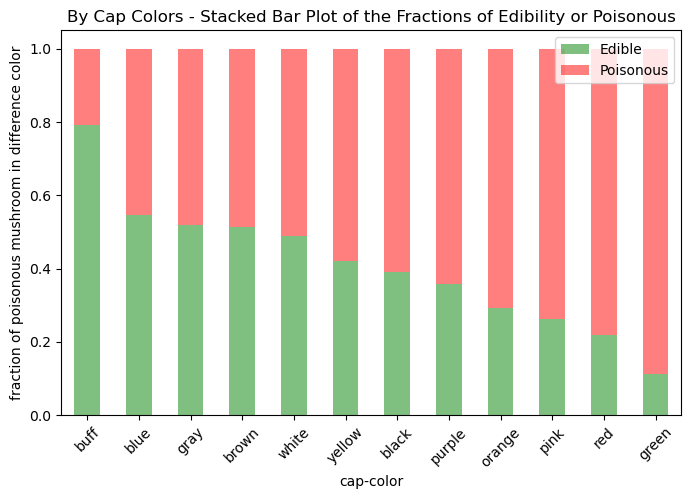

In [153]:
count_matrix = df.groupby(['cap-color', 'class']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0).sort_values(['e'], ascending=False)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(8,5), alpha=0.5, color = ['green', 'red'])
plt.ylabel('fraction of poisonous mushroom in difference color')
plt.title('By Cap Colors - Stacked Bar Plot of the Fractions of Edibility or Poisonous')
plt.legend(loc=1, labels=['Edible', 'Poisonous'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ['buff','blue','gray','brown','white','yellow','black','purple','orange','pink','red','green'], rotation=45)
plt.show()

2.3 violin Plot stem-width vs. edibility

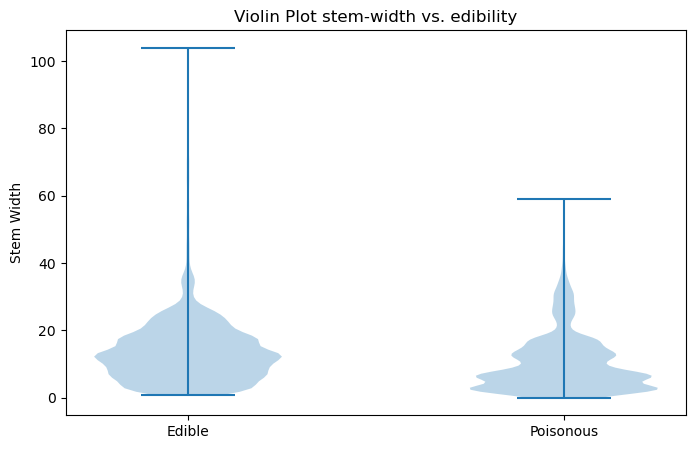

In [226]:
# your code here 
dataset = [df[df['class']=='e']['stem-width'].values,
           df[df['class']=='p']['stem-width'].values]

plt.figure(figsize=(8,5))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Edible','Poisonous'])
plt.ylabel('Stem Width')
plt.title('Violin Plot stem-width vs. edibility')
plt.show()

2.4 stacked bar plot of season vs. edibility

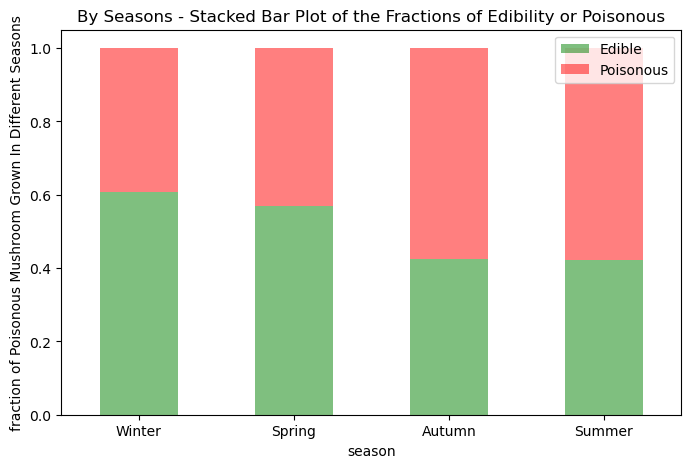

In [152]:
count_matrix = df.groupby(['season', 'class']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0).sort_values(['e'], ascending=False)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(8,5), alpha=0.5, color = ['green', 'red'])
plt.ylabel('fraction of Poisonous Mushroom Grown In Different Seasons')
plt.title('By Seasons - Stacked Bar Plot of the Fractions of Edibility or Poisonous')
plt.legend(loc=1, labels=['Edible', 'Poisonous'])
plt.xticks([0,1,2,3], 
           ['Winter', 'Spring', 'Autumn', 'Summer'], rotation=0)
plt.show()

2.5 stacked bar plot of habitat vs. edibility

In [140]:
count_matrix = df.groupby(['habitat', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0).sort_values(['e'], ascending=False)
count_matrix_norm

class,e,p
habitat,,
u,1.000000,0.000000
w,1.000000,0.000000
l,0.611742,0.388258
m,0.488699,0.511301
d,0.456084,0.543916
h,0.347826,0.652174
g,0.313358,0.686642
p,0.000000,1.000000


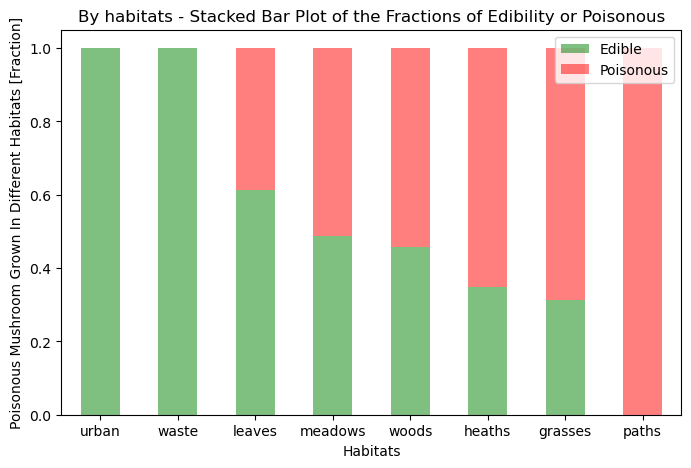

In [190]:
count_matrix = df.groupby(['habitat', 'class']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0).sort_values(['e'], ascending=False)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(8,5), alpha=0.5, color = ['green', 'red'])
plt.ylabel('Poisonous Mushroom Grown In Different Habitats [Fraction]')
plt.xlabel('Habitats')
plt.title('By habitats - Stacked Bar Plot of the Fractions of Edibility or Poisonous')
plt.legend(loc=1, labels=['Edible', 'Poisonous'])
plt.xticks([0,1,2,3,4,5,6,7], 
           ['urban', 'waste', 'leaves', 'meadows', 'woods', 'heaths', 'grasses', 'paths'], rotation=0)
plt.show()

2.6 boxplot of cap-diameter vs. cap shapes

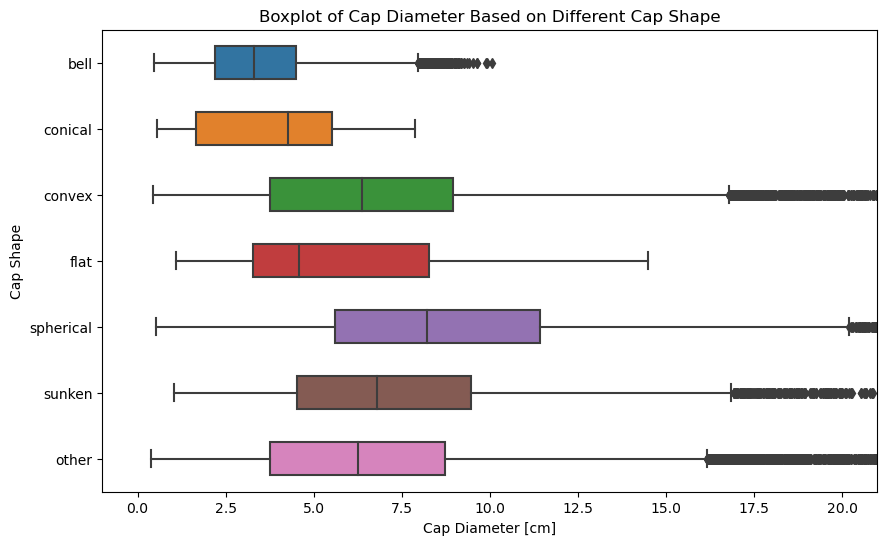

In [199]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x="cap-diameter", y="cap-shape", width=.5)
ax.set_xlim(-1, 21)
ax.set_ylabel('Cap Shape')
ax.set_xlabel('Cap Diameter [cm]')
ax.set_title('Boxplot of Cap Diameter Based on Different Cap Shape')
plt.yticks([0,1,2,3,4,5,6], ['bell', 'conical', 'convex', 'flat', 'spherical', 'sunken', 'other'])
plt.show()

<Figure size 1000x700 with 0 Axes>

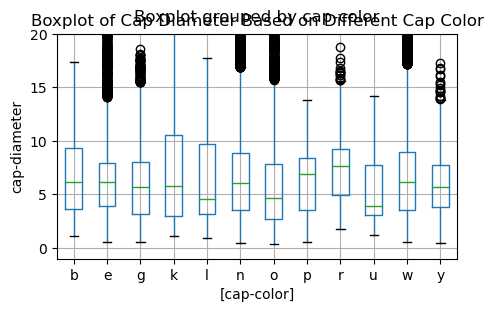

In [172]:
plt.figure(figsize=(10,7))
df[['cap-diameter','cap-color']].boxplot(by='cap-color',figsize=(5,3))
plt.ylabel('cap-diameter')
plt.title('Boxplot of Cap Diameter Based on Different Cap Color')
plt.ylim(-1, 20)
plt.show()

2.7 category-specific histogram of stem-width vs. edibility

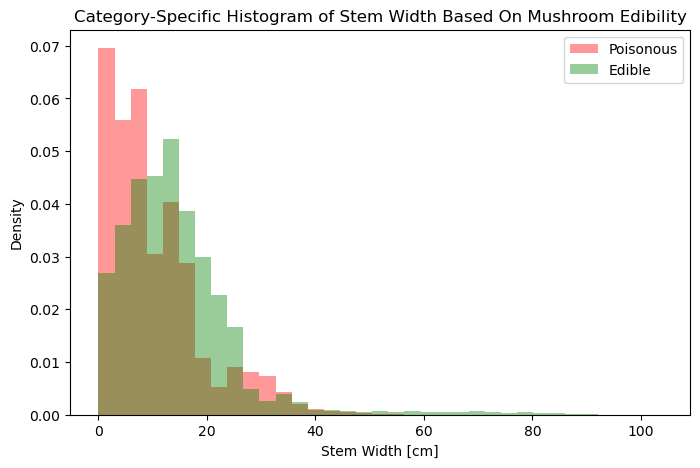

In [193]:
categories = df['class'].unique()
bin_range = (df['stem-width'].min(),df['stem-width'].max())
dict_color = dict(
    {'e': 'green',
    'p': 'red'}
)
plt.figure(figsize=(8,5))

for c in categories:
    plt.hist(df[df['class']==c]['stem-width'],alpha=0.4,label=c,range=bin_range,bins=35,density=True,color=dict_color[c])
plt.legend(labels = ['Poisonous', 'Edible'])
plt.title('Category-Specific Histogram of Stem Width Based On Mushroom Edibility')
plt.ylabel('Density')
plt.xlabel('Stem Width [cm]')
plt.show()

2.8 scatter plot of stem-width vs. stem-height

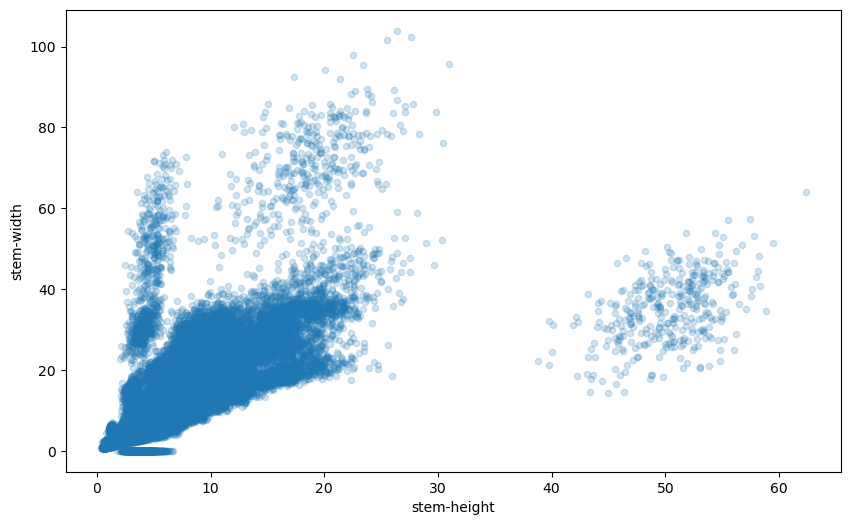

In [20]:
df.plot.scatter('cap-diameter','stem-width', figsize=(10,6), alpha=0.2,s=20)
plt.xlabel('stem-height')
plt.ylabel('stem-width')
plt.show()

2.9 heatmap of stem-width vs. stem-height

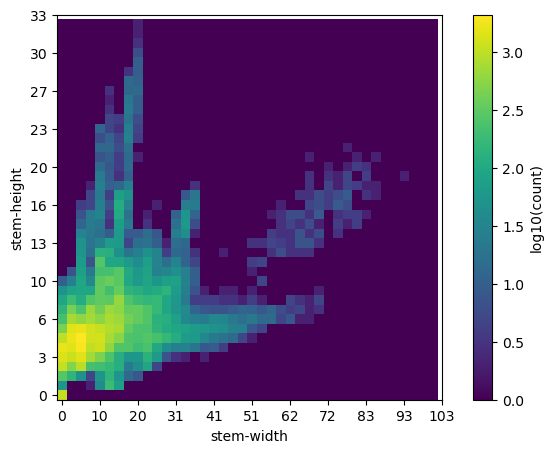

In [58]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['stem-width'], df['stem-height'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(8,5))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('stem-width')
plt.ylabel('stem-height')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

2.10 Distribution of the target variable

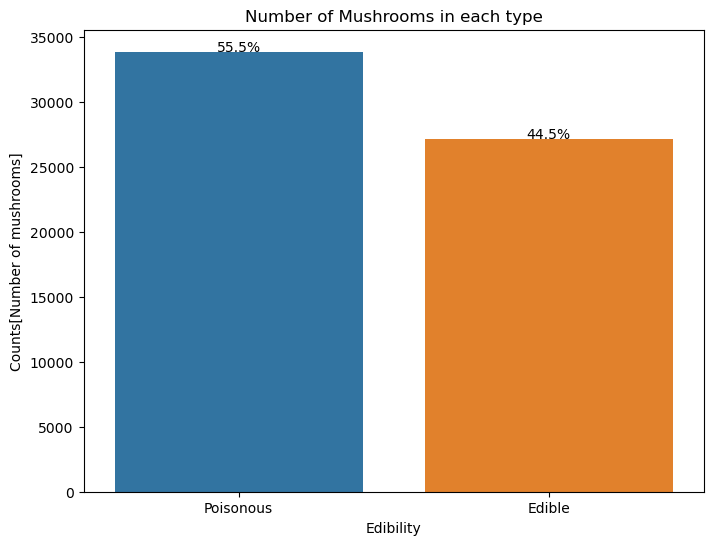

In [29]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['class'])#, palette={'e': 'green', 'p': 'red'}, alpha=0.5)
sns.color_palette("colorblind")

# Adding labels and title
plt.xlabel('Edibility')
plt.ylabel('Counts[Number of mushrooms]')
plt.title('Number of Mushrooms in each type')
plt.xticks([0,1], ['Poisonous', 'Edible'])

total = len(df['class'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center')


# Display the plot
plt.show()

# 3. Splitting

3.1 basic split (train_test_split)

In [60]:
# split the dataset into Other set and Test set
def basic_split(X, y, other_size, test_size, random_state):
    # test the inputs
    if (other_size+test_size != 1):
        print("The split size does not add up to 1")
        raise ValueError
    if not isinstance(random_state, int):
        print("The random state entered in not an integer")
        raise ValueError
    if X.shape[0] != y.shape[0]:
        print("The number of rows in X is not the same as the length of y")
        raise ValueError
    if len(X.shape) != 2:
        print("Input X is not a 2-D pandas dataframe")
        raise ValueError
    if len(y.shape) != 1:
        print("Input y is not a 1-D pandas series")
        raise ValueError

    # split the dataset into other and test
    X_other, X_test, y_other, y_test = train_test_split(X, y,
                                                          train_size = other_size, 
                                                          random_state = random_state)
  
    return X_other, y_other, X_test, y_test

In [158]:
# split the dataset
X_other, y_other, X_test, y_test = basic_split(X, y, other_size = 0.8, test_size = 0.2, random_state=42)
print('The shape of each train, val, and test set are the following:')
print('X_other: {a}, X_test: {b}'.format(a=X_other.shape, b=X_test.shape))
print('y_other: {a}, y_test: {b}'.format(a=y_other.shape, b=y_test.shape))

The shape of each train, val, and test set are the following:
X_other: (48855, 20), X_test: (12214, 20)
y_other: (48855,), y_test: (12214,)


# 4. Preprocessing

4.1 encoders

In [208]:
binary_feature = ['does-bruise-or-bleed', 'has-ring']
onehot_features = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 'gill-color','stem-root', 
                'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color', 'habitat', 'season']
std_features = ['cap-diameter','stem-height','stem-width']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_features),
        ('std', StandardScaler(), std_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
clf.set_output(transform='pandas')

X_other_prep = clf.fit_transform(X_other) # save for later use
X_test_prep = clf.transform(X_test)

print('Shape of X_train before transformation:', X_other.shape)
print('Shape of X_train after transformation:', X_other_prep.shape)
print('Note: the X_train here refers to X_other in code')
X_other_prep.head()


Shape of X_train before transformation: (48855, 20)
Shape of X_train after transformation: (48855, 124)
Note: the X_train here refers to X_other in code


,onehot__cap-shape_b,onehot__cap-shape_c,onehot__cap-shape_f,onehot__cap-shape_o,onehot__cap-shape_p,onehot__cap-shape_s,onehot__cap-shape_x,onehot__cap-surface_d,onehot__cap-surface_e,onehot__cap-surface_g,...,onehot__habitat_p,onehot__habitat_u,onehot__habitat_w,onehot__season_a,onehot__season_s,onehot__season_u,onehot__season_w,std__cap-diameter,std__stem-height,std__stem-width
42308,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.813292,-0.906761,-0.138059
39798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.397978,-0.043783,-0.486727
40487,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.185757,-0.141984,-0.379445
27727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.036474,0.250820,-0.243355
25153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.852752,0.063345,1.020196


4.2 conact the transformed df with the untransform binary data

In [214]:
X_other[['does-bruise-or-bleed', 'has-ring']]

,does-bruise-or-bleed,has-ring
42308,f,t
39798,f,f
40487,f,f
27727,t,f
25153,f,f
...,...,...
54343,f,f
38158,f,f
860,f,t
15795,t,f


In [219]:
result = pd.concat([X_other_prep, X_other[['does-bruise-or-bleed', 'has-ring']]], axis=1)
result

,onehot__cap-shape_b,onehot__cap-shape_c,onehot__cap-shape_f,onehot__cap-shape_o,onehot__cap-shape_p,onehot__cap-shape_s,onehot__cap-shape_x,onehot__cap-surface_d,onehot__cap-surface_e,onehot__cap-surface_g,...,onehot__habitat_w,onehot__season_a,onehot__season_s,onehot__season_u,onehot__season_w,std__cap-diameter,std__stem-height,std__stem-width,does-bruise-or-bleed,has-ring
42308,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.813292,-0.906761,-0.138059,f,t
39798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.397978,-0.043783,-0.486727,f,f
40487,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.185757,-0.141984,-0.379445,f,f
27727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.036474,0.250820,-0.243355,t,f
25153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.852752,0.063345,1.020196,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.229556,-1.222195,-0.618844,f,f
38158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.183843,1.598851,0.313919,f,f
860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.064231,1.253660,0.114254,f,t
15795,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.011593,-0.043783,0.412261,t,f


4.3 Check the missing values after transformation

In [65]:
# Check the missing values of data
# columns that have missing value
perc_missing_per_ftr = X_other_prep.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
Series([], dtype: float64)


# 5. Perform KFold (adding to splitting procedure)

5.1 Kfold function for iteration

In [68]:
def perform_kfold(X_other, y_other, nfolds, random_state, clf: Pipeline):
    ''' 
    X_other: pandas dataframe
    y_other: pandas dataframe
    nfolds: the folds number we want to perform in kfold
    random_state: the random state
    clf: the preprocessor pipeline for scaling and standardizing
    '''
    res_score_metrics = dict()
    kf = KFold(n_splits=nfolds,shuffle=True,random_state=random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]

        # transform the 
        X_train_prep = clf.fit_transform(X_train)
        X_val_prep = clf.transform(X_val)

        # later the different models will be used here to calculate the accuracy score, and then compute the average of this score
    return res_score_metrics

# 6. Feature Selection

In [70]:
np.random.seed(10)

f_test, p_values = f_classif(X_other_prep, y_other)
#print('f score',f_test)
#print('p values',p_values)
mi = mutual_info_classif(X_other_prep, y_other)
#print('mi',mi)

6.1 linear correlation with target variable

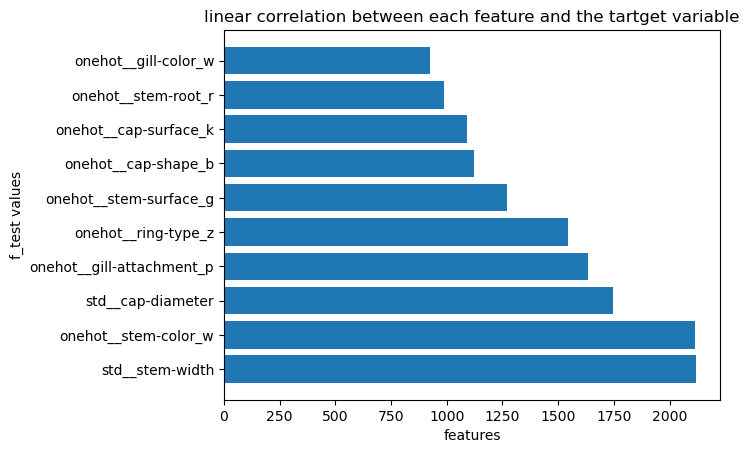

In [71]:
# perform the f test to test the linear correlation between features and target var
f_test, p_values = f_classif(X_other_prep, y_other)
df_ftest = pd.DataFrame(dict(
    features = X_other_prep.columns,
    f_test = f_test,
    p_values = p_values
)).sort_values('f_test', ascending=False)

# plot the bar plot
plt.barh(df_ftest.features[:10], df_ftest.f_test[:10])
plt.ylabel('f_test values')
plt.xlabel('features')
plt.title('linear correlation between each feature and the tartget variable')
plt.show()

6.2 nonlinear correlation with target variable

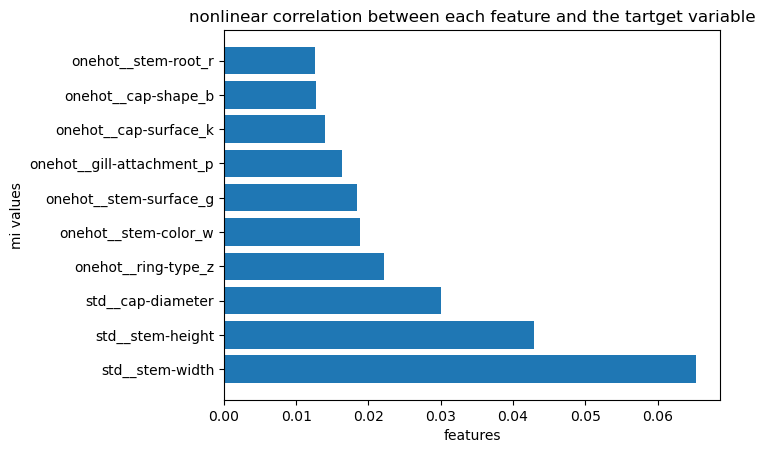

In [228]:
# perform the f test to test the linear correlation between features and target var
mi = mutual_info_classif(X_other_prep, y_other)
df_mitest = pd.DataFrame(dict(
    features = X_other_prep.columns,
    mi = mi
)).sort_values('mi', ascending=False)

# plot the bar plot
plt.barh(df_mitest.features[:10], df_mitest.mi[:10])
plt.ylabel('mi values')
plt.xlabel('features')
plt.title('nonlinear correlation between each feature and the tartget variable')
plt.show()